<a href="https://colab.research.google.com/github/Adityakushwaha2006/TrailB_MathAnalysis_Code/blob/main/Trail_B_MathAnalysis_practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

So we start with Constraint Analysis. For this lets say theres a score S = f(a, b, c) where a, b, c are ur parameters like weight or flight time. Assume some default values for a, b, c and get some default S. Now you need to graph dS/S vs dp/p where p is any of the a, b, c. For each curve on that graph ull only vary a specific parameter (lets say b) while keeping the rest at default value. You go from 50% to 150% of default p and get the corresponding S for each. Then dS is the value of S minus default value and same for dp. Now get curves for all a, b, c on the same graph, for some function of S lets say S = ab/c or something. The graph shud be centered at default value of p and S and so all curves should pass thru the origin.

In [8]:
import math
import matplotlib.pyplot as plt
import csv
import numpy as np

In [5]:
#Defining S=f(a,b,c) (Score function)
'''later on we'll have to change S and number of constraints.'''

#Specifying default values of a,b,c
a_default= 1000         #weight of aircraft (in g) ->Measured(not constraint)
b_default= 1500         #Net thrust (in gm) -> Proportional to net weight as prop to weight of motor , therefore let b=(k1)*a
c_default= 500          #Since its reciprocal in Score function we take it as net drag  ->prop to b^2 , and prop to c(as c increases area increases, find exact prop reln after)

'''finally when we define S , we need it in the non-deductable form,  that is the constrainst should ideally not be dependant on each other, we'll most probably
have to substitute to get the form of S only dependent on the params that we have absolute control over, like weight and CG etc etc'''

S_default=(a_default*b_default)/c_default
print(a_default,b_default,c_default,S_default)


1000 1500 500 3000.0


In [16]:
#Creating the numpy arrays of the value points
#number of index points
index_points=2000

a_array=np.linspace((a_default/2),((3*a_default)/2),num=index_points,endpoint=False)
b_array=np.linspace((b_default/2),((3*b_default)/2),num=index_points,endpoint=False)
c_array=np.linspace((c_default/2),((3*c_default)/2),num=index_points,endpoint=False)
#Now these give 3 arrays for a ,b,c between 50% of their default and 150%
#Making a 1-d array for S
S_array=[]
for i in range(index_points):
  S=(a_array[i]*b_array[i])/c_array[i]
  S_array.append(S)
#Now we have a list for S with a one to one correspondence from a,b,c in all their respective arrays


In [23]:
#Keep 2 var constant at a time
S_a = (a_array * b_default) / c_default

S_b = (a_default * b_array) / c_default

S_c = (a_default * b_default) / c_array

# Normalize parameters and scores
a_array_normalized = (a_array - a_default) / a_default
b_array_normalized = (b_array - b_default) / b_default
c_array_normalized = (c_array - c_default) / c_default
S_a_normalized = (S_a - S_default) / S_default
S_b_normalized = (S_b - S_default) / S_default
S_c_normalized = (S_c - S_default) / S_default

<ipython-input-23-56880300b940>:6: RuntimeWarning: divide by zero encountered in divide
  S_c = (a_default * b_default) / c_array


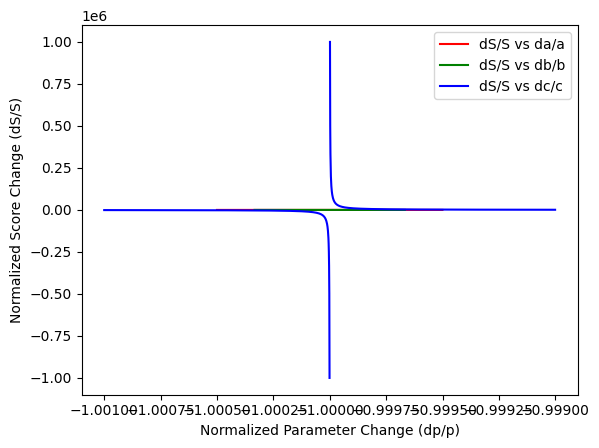

In [24]:
#PLOTTING


plt.plot(a_array_normalized, S_a_normalized, 'red', label='dS/S vs da/a')
plt.plot(b_array_normalized, S_b_normalized, 'green', label='dS/S vs db/b')
plt.plot(c_array_normalized, S_c_normalized, 'blue', label='dS/S vs dc/c')
plt.legend()
plt.xlabel('Normalized Parameter Change (dp/p)')
plt.ylabel('Normalized Score Change (dS/S)')
plt.show()